# Web Scrapping

In [5]:
import requests 
import pandas as pd 
from bs4 import BeautifulSoup

URL = '' #URL removed for private data reasons 
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table',attrs={"id":"weather_records"})

#Gathering column headers 
column_names = []
for row in table.find_all('th'):
    column_names.append(row.text) 

#Gathering table contents, all found in 'td' objects 
content = []
for row in table.find_all('tr'): #<tr> the row 
    if not row.find_all('th'): #<th> is the first row AKA column headers 
        content.append([
            element.text for element in row.find_all('td') #<td> is the cell per row 
        ]) 

weather_records = pd.DataFrame(content, columns=column_names)
weather_records.head()

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


## Exploratory Data Analysis

In [6]:
import pandas as pd 
companies = pd.read_csv('project_sql_result_01.csv')
neighborhoods = pd.read_csv('project_sql_result_04.csv')

##### Companies

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [9]:
def removeNumbers(name):
    newName = name.lstrip('0123456789.- ')
    return newName
companies['company_name'] = companies['company_name'].apply(removeNumbers)

The company dataframe only has two columns, company_name and trips_amount. They are in the correct data type of object (strings) and int64, respectively. I noticed that there were various companies with odd numbers and symbols in the front of their string, so I removed them so I could sleep better at night. Hopefully this doesn't change anything important. 

##### Neighborhoods

In [10]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The neighborhoods dataframe only has two columns, dropoff_location_name and average_trips. They are also in the correct data type of object (strings) and float64, respectively. 

#### Top 10 neighborhoods in terms of drop-offs

In [11]:
neighborhoods.sort_values('average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Above are the top 10 neighborhoods based on average daily trips. I know the neighborhoods dataframe was already in greatest-least in terms of average_trips, but I just wanted to make sure. I can already see a large drop off from West Loop (3) to O'Hare (4) of about 2500 average trip difference.

#### Taxi companies and number of rides - graph

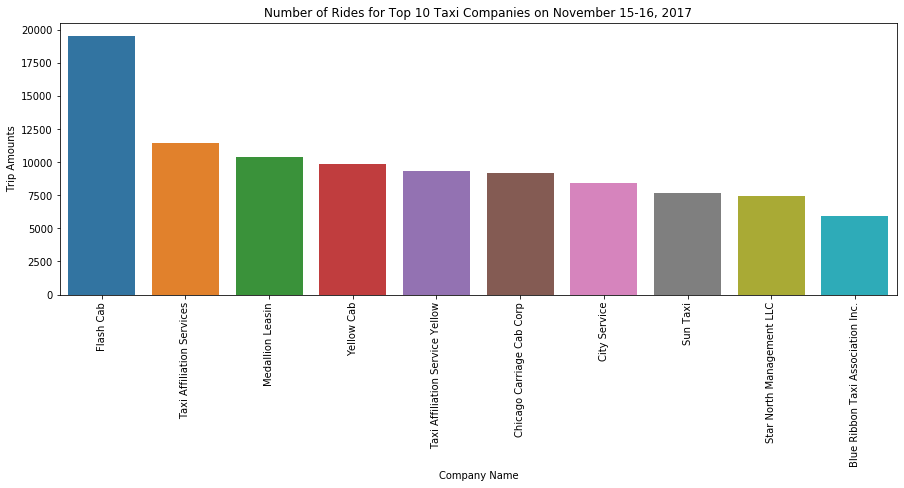

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots(figsize=(15,5))
chart = sns.barplot(
    x='company_name',
    y='trips_amount',
    data=companies.head(10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90) 
chart.set(xlabel='Company Name', ylabel='Trip Amounts')
plt.title('Number of Rides for Top 10 Taxi Companies on November 15-16, 2017')
plt.show()

From the November 15-16, 2017 we can see that company "Flash Cab" is the clear winner of these taxi companies. Flash Cab reached 19558 trips which is over 8000 more trips than the second highest taxi company, Taxi Affiliation Services. Without considering the highest performing taxi company, the distribution of the top performing taxi companies during this time period follows a smooth downward trend, with each company being only about 200-1000 trips away for the next highest rank. 

#### Top 10 neighborhoods by number of dropoffs - graph

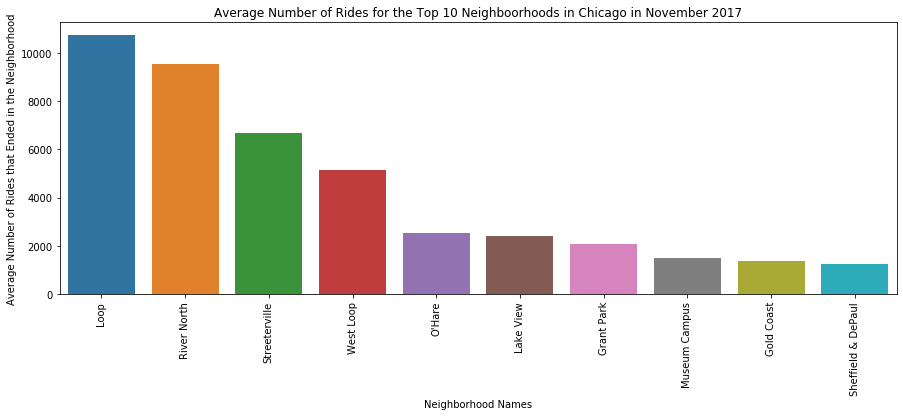

In [13]:
ax = plt.subplots(figsize=(15,5))
chart = sns.barplot(
    x='dropoff_location_name',
    y='average_trips',
    data=neighborhoods.head(10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90) 
chart.set(xlabel='Neighborhood Names', ylabel='Average Number of Rides that Ended in the Neighborhood')
plt.title('Average Number of Rides for the Top 10 Neighboorhoods in Chicago in November 2017')
plt.show()

The first and second most popular neighborhood are similar in range of only being 1200 rides away. There is a bit of a drop off, but the third and fourth neighborhoods are similar in range to each other. The is a distinct divide of just popular neighborhoods and the extremely popular neighborhoods receiving rides. The top four neighborhoods (Loop, River North, Streeterville, West Loop) are all above 5000 rides and then there is a sudden drop after the fourth most popular neighborhood. 

After West Loop, there is a drop from 5163 to 2546 rides and also a smoother distribution henceforth. All the other neighborhoods are about 100-500 rides in range from it's adjacent rank. The overall range of the top 10 neighborhoods is large with Loop having the highest average trips of 10727 rides and Sheffield & DePaul having the lowest of the top 10 neighborhoods at 1259 average rides. 

## Testing hypotheses

In [2]:
df = pd.read_csv('project_sql_result_07.csv')
df['day'] = pd.to_datetime(df['start_ts'], format='%Y-%m-%d %H:%M:%S')
df['day'] = df['day'].dt.weekday
df.head()

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


All the days are Saturday?

#### Testing whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

H0: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays and normal rides are equal to each other 

H1: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays and normal rides are NOT equal to each other 

In [20]:
from scipy import stats as st
df_rain = df.query('weather_conditions == "Bad"').drop(df.columns.difference(['duration_seconds']), 1)
df_other = df.query('weather_conditions == "Good"').drop(df.columns.difference(['duration_seconds']), 1)

alpha = .05 #using 95% critical value because that's academically standard 
results = st.ttest_ind(df_rain, df_other)

print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("""We can't reject the null hypothesis""")

p-value:  [6.51797033e-12]
We reject the null hypothesis


We reject the null hypothesis: The p-value is less than the critical value (0.05), thus there is sufficient evidence to conclude that the average duration of rides from the Loop to O'Hare International Airport from rainy Saturdays to normal Saturdays are NOT the same. The p-value tells us that there is an extremely low probability of getting the same average ride duration for a rainy Saturday and a non-rainy Saturday. 